In [1]:
import torch
import torch.nn as nn

# Inside the /Multimodal-Deep-Regression/notebooks
import sys
sys.path.append("..")

from util.data_utilities import process_data
from util.utilities import get_device

In [2]:
# This need to same as the main & preprocess
frames_to_skip=200 # how many frame to skip, reduce depth
shrink=8 # shrink H x W, the higher the smaller scale
normalize=False # normalize the pixel to 0 to 1

In [3]:
process_data(
    input_type='video_pack_1000', 
    addition_parameters={'first_n_videos': 5}, 
    verbose=True,
    device=get_device(),
    skip_frames=False#, frames_to_skip=frames_to_skip, shrink=shrink , normalize=normalize
    )

You are using device: cpu
Currently processing: 7222730607598570794.mp4


/Users/ahmedsalih/anaconda3/envs/cs7643-a2/lib/python3.9/site-packages/torchvision/io/video_reader.py:245: UserWarning: Accurate seek is not implemented for pyav backend
  warnings.warn("Accurate seek is not implemented for pyav backend")


7222730607598570794
13800.0
Done processing: ../data/video_packs/video_pack_1000/7222730607598570794.mp4.
X Tensor (torch.Size([3, 1257, 1024, 576])) saved under: ../data/x_tensors/video_pack_1000/7222730607598570794_x_tensor.pt.
Y Tensor (torch.Size([1, 1])) saved under: ../data/y_tensors/video_pack_1000/7222730607598570794_y_tensor.pt.
metadata:
{'video': {'fps': [30.0], 'duration': [41.9]}, 'audio': {'framerate': [44100.0], 'duration': [41.88700680272109]}}


Currently processing: 7243923047206604078.mp4
7243923047206604078
2700.0
Done processing: ../data/video_packs/video_pack_1000/7243923047206604078.mp4.
X Tensor (torch.Size([3, 4317, 1024, 576])) saved under: ../data/x_tensors/video_pack_1000/7243923047206604078_x_tensor.pt.
Y Tensor (torch.Size([1, 1])) saved under: ../data/y_tensors/video_pack_1000/7243923047206604078_y_tensor.pt.
metadata:
{'video': {'fps': [30.0], 'duration': [143.9]}, 'audio': {'framerate': [44100.0], 'duration': [143.9150113378685]}}


Currently processing

You are using device: cpu


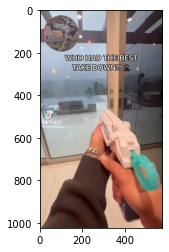

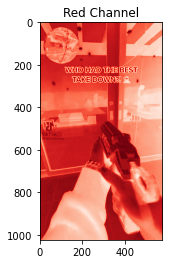

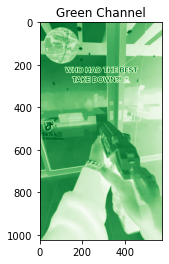

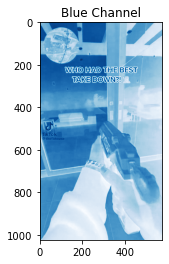

In [8]:
# check on the tensor
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from util.data_utilities import get_base_tensor_directories, generate_batch
from util.data_utilities import process_data

device = get_device()
x_dir, y_dir = get_base_tensor_directories(input_type='video_pack_1000')
x_files = sorted([os.path.join(x_dir, f) for f in os.listdir(x_dir)])
x_data = [torch.load(f) for f in x_files]

# select the video & frame
video = 1
frame = 1

# select a frame
image_tensor = x_data[video] [:,frame,:,:]
numpy_image = image_tensor.detach().numpy()

# imshow (Height, Width, Channels)
numpy_image = numpy_image.transpose((1, 2, 0))

# normalize to 0,1
numpy_image = (numpy_image - numpy_image.min()) / (numpy_image.max() - numpy_image.min())

plt.imshow(numpy_image)
plt.show()

# Red channel
plt.imshow(numpy_image[:,:,0], cmap='Reds')
plt.title("Red Channel")
plt.show()

# Green channel
plt.imshow(numpy_image[:,:,1], cmap='Greens')
plt.title("Green Channel")
plt.show()

# Blue channel
plt.imshow(numpy_image[:,:,2], cmap='Blues')
plt.title("Blue Channel")
plt.show()


In [9]:
x_files

['../data/x_tensors/video_pack_1000/7212745688826793221_x_tensor.pt',
 '../data/x_tensors/video_pack_1000/7222730607598570794_x_tensor.pt',
 '../data/x_tensors/video_pack_1000/7222971039221861637_x_tensor.pt',
 '../data/x_tensors/video_pack_1000/7243658852988620059_x_tensor.pt',
 '../data/x_tensors/video_pack_1000/7243923047206604078_x_tensor.pt']

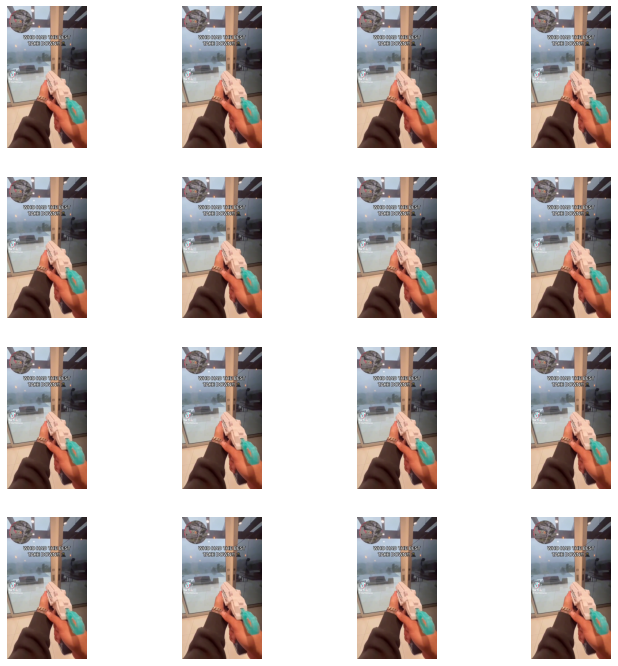

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_data[video] [:,frame,:,:].permute(1, 2, 0))
    plt.axis("off")